<a href="https://colab.research.google.com/github/faitlere/faithsportfolio.github.io/blob/main/Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, chi2_contingency

In [4]:
#  Load data
# df = pd.read_csv('/Users/faitholalere/Documents/Masters/Dissertation/Data/HR_Analytics.csv')

df = pd.read_csv("/content/HR_Analytics.csv")

In [5]:
# split numeric and categorical variables
numeric_columns = [
    "Age","MonthlyIncome","TotalWorkingYears","YearsAtCompany",
    "YearsInCurrentRole","YearsSinceLastPromotion","PercentSalaryHike",
    "DistanceFromHome","TrainingTimesLastYear"]
categorical_columns = [
    "Gender","JobLevel","JobRole","Department","EducationField",
    "BusinessTravel","OverTime","MaritalStatus","SalarySlab",
    "JobSatisfaction","PerformanceRating","WorkLifeBalance","Attrition"]


In [6]:
# Adding in Binary variables so it can be used easily in my models
df["Senior_role"] = (df["JobLevel"] >= 2).astype(int) # any thing higher than 2 is a senior role lower is mid/junior
df["Attrition_binary"] = (df["Attrition"] == "Yes").astype(int) #yes = 0 (Emoloyee has left) no = 1(employee stayed)

In [7]:
#  Frequencies (categoricals)
for c in categorical_columns: #loops thru each variable to count
    counts = df[c].value_counts(dropna=False) # skip missing records
    print("Table to show counts & Percentage of data for each variable")
    print(f"\n{c} counts (%):")
    print(pd.DataFrame({"count": counts, "percentage": (counts/len(df)*100).round(1)}))

# Summary Stats - Variables by Gender
for col in ["MonthlyIncome","JobLevel","YearsSinceLastPromotion",
            "YearsInCurrentRole","PercentSalaryHike","TotalWorkingYears",
            "DistanceFromHome","TrainingTimesLastYear","YearsAtCompany"]:
    print(f"\n{col} by Gender:")
    print(df.groupby("Gender")[col].describe())


Table to show counts & Percentage of data for each variable

Gender counts (%):
        count  percentage
Gender                   
Male      889        60.1
Female    591        39.9
Table to show counts & Percentage of data for each variable

JobLevel counts (%):
          count  percentage
JobLevel                   
1           545        36.8
2           539        36.4
3           220        14.9
4           107         7.2
5            69         4.7
Table to show counts & Percentage of data for each variable

JobRole counts (%):
                           count  percentage
JobRole                                     
Sales Executive              329        22.2
Research Scientist           293        19.8
Laboratory Technician        261        17.6
Manufacturing Director       147         9.9
Healthcare Representative    132         8.9
Manager                      102         6.9
Sales Representative          84         5.7
Research Director             80         5.4
Human R

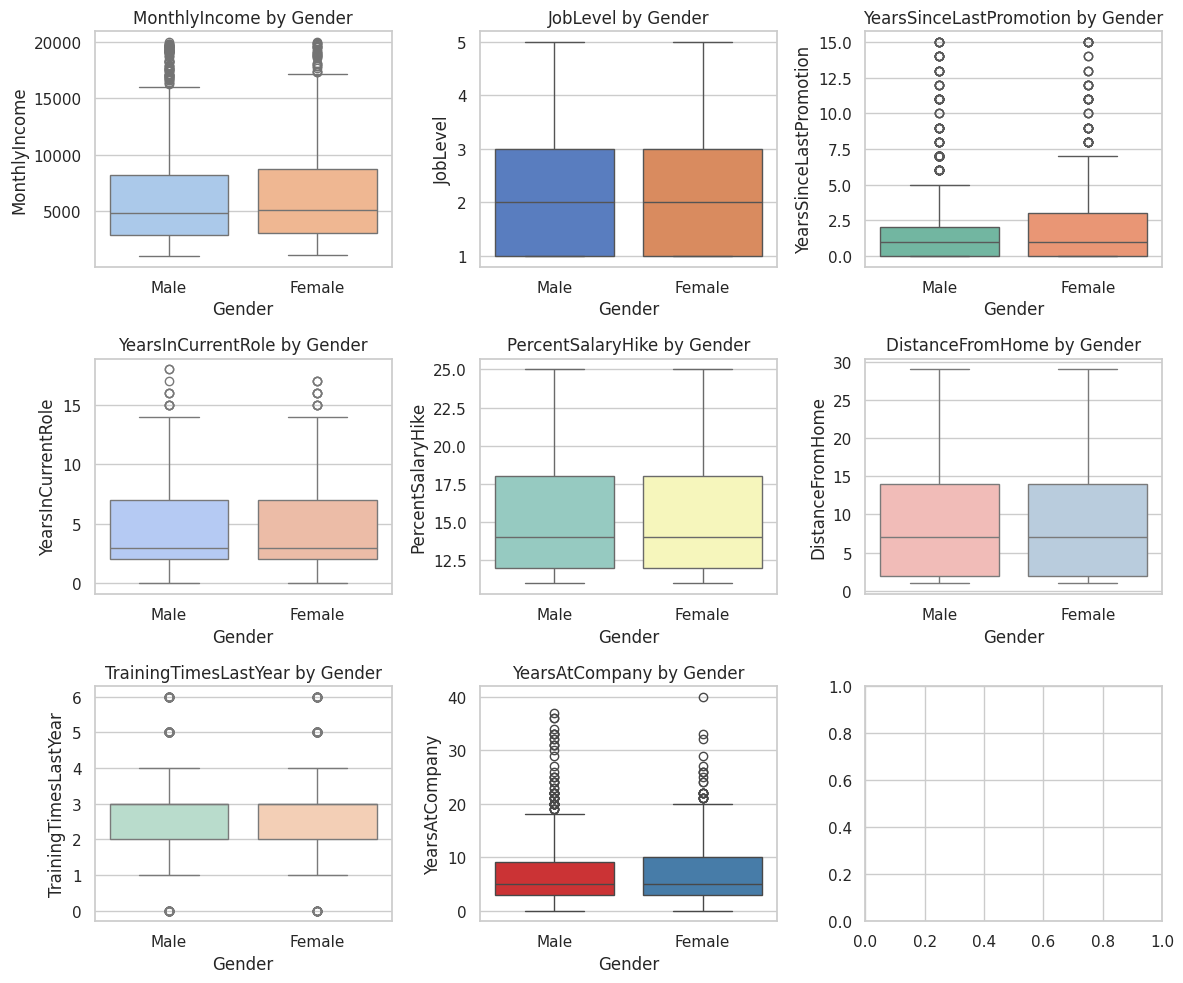

In [8]:
# Visual - Boxplots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
plots = [
    ("MonthlyIncome","pastel"), ("JobLevel","muted"), ("YearsSinceLastPromotion","Set2"),
    ("YearsInCurrentRole","coolwarm"), ("PercentSalaryHike","Set3"), ("DistanceFromHome","Pastel1"),
    ("TrainingTimesLastYear","Pastel2"), ("YearsAtCompany","Set1")
]

for (col,pal), ax in zip(plots, axes.flat):
    sns.boxplot(data=df, x="Gender", y=col, hue="Gender", palette=pal,
                dodge=False, legend=False, ax=ax)
    ax.set_title(f"{col} by Gender")
# fig.delaxes(axes[2,2])
plt.tight_layout()


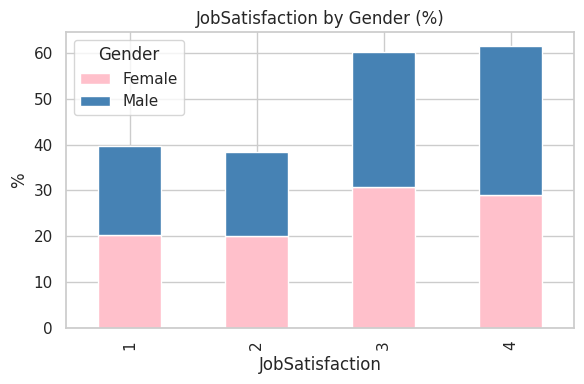

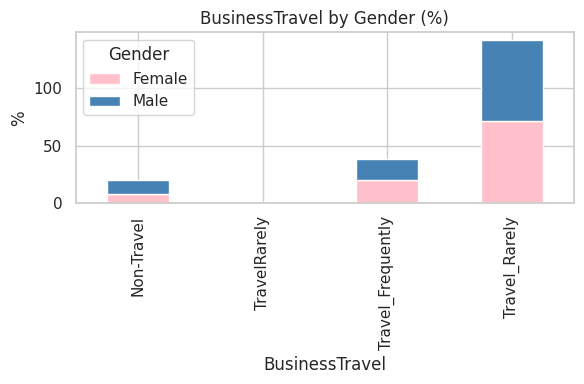

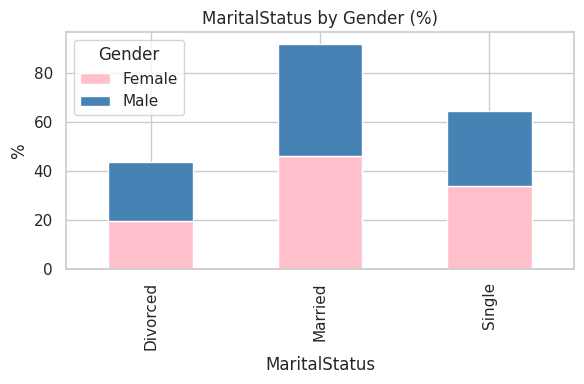

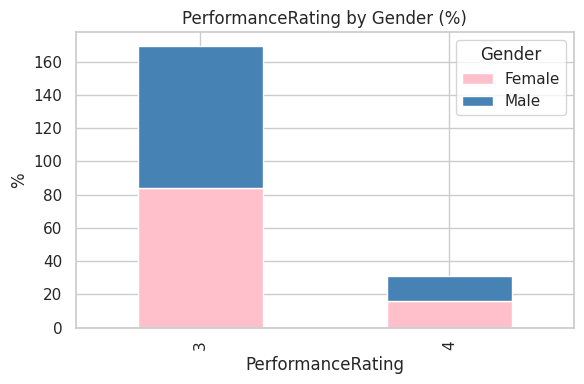

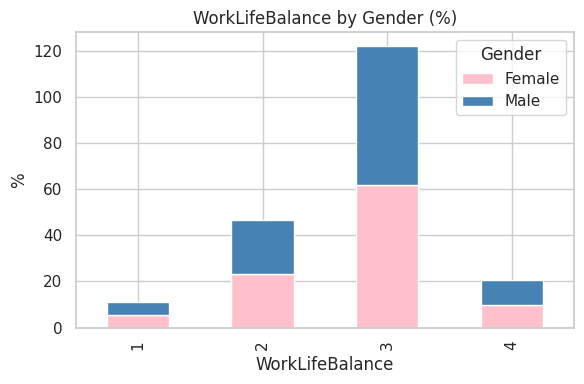

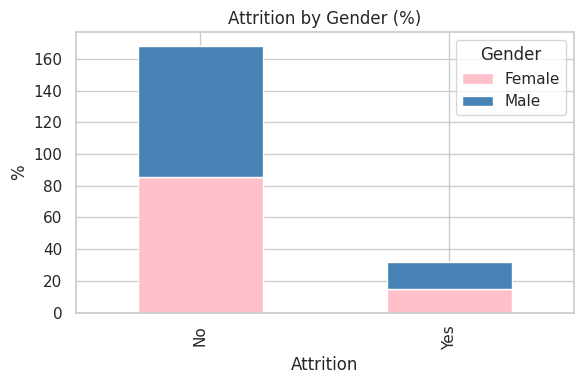

In [17]:
plots2 = ["JobSatisfaction","BusinessTravel","MaritalStatus",
        "PerformanceRating","WorkLifeBalance","Attrition"]

colors = ["pink", "steelblue"]
for c in plots2:
    ct = pd.crosstab(df[c], df["Gender"], normalize="columns") * 100
    ax = ct.plot(kind="bar", stacked=True, figsize=(6, 4), color=colors)
    ax.set_title(f"{c} by Gender (%)")
    ax.set_ylabel("%")
    plt.tight_layout()
    plt.show()

In [18]:
# Chi-square vs Gender
chi_rows = []
for c in ["JobSatisfaction","BusinessTravel","MaritalStatus",
          "PerformanceRating","WorkLifeBalance","Attrition","OverTime","Senior_role"]:
    ct = pd.crosstab(df[c], df["Gender"])
    chi2, p, dof, exp = chi2_contingency(ct)
    chi_rows.append({"var": c, "chi2": chi2, "p": p, "sig_0.05": p < 0.05})
chi_df = pd.DataFrame(chi_rows)
print("\nChi-square vs Gender:\n", chi_df)


Chi-square vs Gender:
                  var      chi2         p  sig_0.05
0    JobSatisfaction  2.314112  0.509823     False
1     BusinessTravel  4.925255  0.177353     False
2      MaritalStatus  3.799410  0.149613     False
3  PerformanceRating  0.176619  0.674295     False
4    WorkLifeBalance  0.884462  0.829176     False
5          Attrition  1.186442  0.276048     False
6           OverTime  2.200515  0.137965     False
7        Senior_role  3.151020  0.075880     False


In [20]:
plots3 = ["JobSatisfaction","BusinessTravel","MaritalStatus",
        "PerformanceRating","WorkLifeBalance","Attrition","OverTime","Senior_role"]

rows = []
for c in plots3:
    chi2, p, dof, exp = chi2_contingency(pd.crosstab(df[c], df["Gender"]))
    rows.append({"var": c, "chi2": chi2, "p": p, "sig_0.05": p < 0.05})

chi_df = pd.DataFrame(rows)
print("\nChi-square vs Gender:\n", chi_df)


Chi-square vs Gender:
                  var      chi2         p  sig_0.05
0    JobSatisfaction  2.314112  0.509823     False
1     BusinessTravel  4.925255  0.177353     False
2      MaritalStatus  3.799410  0.149613     False
3  PerformanceRating  0.176619  0.674295     False
4    WorkLifeBalance  0.884462  0.829176     False
5          Attrition  1.186442  0.276048     False
6           OverTime  2.200515  0.137965     False
7        Senior_role  3.151020  0.075880     False


In [21]:
# Contingency table of Senior_role by Gender, OverTime
ct_hl_gender = pd.crosstab(df["Senior_role"], df["Gender"])
ct_senior_overtime = pd.crosstab(df["Senior_role"], df["OverTime"])
print("\nSenior_role by Gender\n", ct_hl_gender)
print("chi-square:", chi2_contingency(ct_hl_gender)[:2])
print("\nSenior_role by OverTime\n", ct_senior_overtime)
print("chi-square:", chi2_contingency(ct_senior_overtime)[:2])
print("\n% Senior_role within Gender:\n", ct_hl_gender.div(ct_hl_gender.sum(axis=0), axis=1)*100)
print("\n% Senior_role within OverTime:\n", ct_senior_overtime.div(ct_senior_overtime.sum(axis=0), axis=1)*100)



Senior_role by Gender
 Gender       Female  Male
Senior_role              
0               201   344
1               390   545
chi-square: (np.float64(3.1510197184177047), np.float64(0.07587953055049965))

Senior_role by OverTime
 OverTime      No  Yes
Senior_role          
0            389  156
1            673  262
chi-square: (np.float64(0.035519320240986176), np.float64(0.8505116007815481))

% Senior_role within Gender:
 Gender          Female       Male
Senior_role                      
0            34.010152  38.695163
1            65.989848  61.304837

% Senior_role within OverTime:
 OverTime            No        Yes
Senior_role                      
0            36.629002  37.320574
1            63.370998  62.679426


In [22]:
# Job Role and level by Gender
print("\nJobLevel by Gender (% within Gender):")
print(pd.crosstab(df["JobLevel"], df["Gender"], normalize="columns") * 100)
print("\nJobRole by Gender (% within Gender):")
print(pd.crosstab(df["JobRole"], df["Gender"], normalize="columns") * 100)



JobLevel by Gender (% within Gender):
Gender       Female       Male
JobLevel                      
1         34.010152  38.695163
2         37.225042  35.883015
3         15.905245  14.173228
4          8.798646   6.186727
5          4.060914   5.061867

JobRole by Gender (% within Gender):
Gender                        Female       Male
JobRole                                        
Healthcare Representative   8.629442   9.111361
Human Resources             2.707276   4.049494
Laboratory Technician      14.382403  19.797525
Manager                     7.952623   6.186727
Manufacturing Director     12.182741   8.436445
Research Director           5.583756   5.286839
Research Scientist         19.458545  20.022497
Sales Executive            22.504230  22.047244
Sales Representative        6.598985   5.061867


In [23]:
# Pay vs Job Level
print("\nMonthlyIncome by JobLevel:")
print(df.groupby("JobLevel")["MonthlyIncome"].describe())



MonthlyIncome by JobLevel:
          count          mean          std      min      25%      50%  \
JobLevel                                                                
1         545.0   2789.075229   748.517871   1009.0   2307.0   2678.0   
2         539.0   5504.005566  1423.108971   2042.0   4540.0   5343.0   
3         220.0   9822.754545  1799.128131   5210.0   8389.0   9982.5   
4         107.0  15471.327103  1838.563687  11103.0  13746.0  16124.0   
5          69.0  19191.826087   512.383127  18041.0  18880.0  19232.0   

               75%      max  
JobLevel                     
1          3210.00   4968.0  
2          6273.00   9998.0  
3         10826.25  13757.0  
4         17026.50  17924.0  
5         19586.00  19999.0  


In [25]:
# Correlations - Spearman
adv_vars = [
    "JobLevel","MonthlyIncome","YearsSinceLastPromotion","YearsInCurrentRole",
    "PercentSalaryHike","TotalWorkingYears","Age","DistanceFromHome",
    "TrainingTimesLastYear","YearsAtCompany"
]
corr = df[adv_vars].corr(method="spearman")
print("\nSpearman correlation matrix:\n", corr)



Spearman correlation matrix:
                          JobLevel  MonthlyIncome  YearsSinceLastPromotion  \
JobLevel                 1.000000       0.919873                 0.270988   
MonthlyIncome            0.919873       1.000000                 0.266370   
YearsSinceLastPromotion  0.270988       0.266370                 1.000000   
YearsInCurrentRole       0.391358       0.395212                 0.504944   
PercentSalaryHike       -0.034400      -0.034780                -0.058939   
TotalWorkingYears        0.734630       0.708709                 0.335324   
Age                      0.490550       0.471646                 0.175362   
DistanceFromHome         0.023514       0.002924                -0.003200   
TrainingTimesLastYear   -0.018870      -0.035051                 0.010425   
YearsAtCompany           0.472151       0.464479                 0.518135   

                         YearsInCurrentRole  PercentSalaryHike  \
JobLevel                           0.391358          -0

In [26]:
# Correlation tests targets vs predictors
targets = ["JobLevel","MonthlyIncome"]
predictors = ["Age","TotalWorkingYears","YearsAtCompany",
              "YearsSinceLastPromotion","YearsInCurrentRole",
              "PercentSalaryHike","DistanceFromHome","TrainingTimesLastYear"]

rows = []
for tar in targets:
    for pr in predictors:
        rho, p = spearmanr(df[tar], df[pr], nan_policy="omit")
        rows.append({"target": tar, "predictor": pr, "rho": rho, "p": p, "sig_0.05": p < 0.05})
cor_tests = pd.DataFrame(rows)
cor_tests["padj_fdr"] = np.minimum(1, cor_tests["p"].rank(method="first") / len(cor_tests) * cor_tests["p"])
print("\nCorrelation tests (Spearman):\n", cor_tests)



Correlation tests (Spearman):
            target                predictor       rho              p  sig_0.05  \
0        JobLevel                      Age  0.490550   1.890426e-90      True   
1        JobLevel        TotalWorkingYears  0.734630  2.823373e-251      True   
2        JobLevel           YearsAtCompany  0.472151   4.934256e-83      True   
3        JobLevel  YearsSinceLastPromotion  0.270988   2.523178e-26      True   
4        JobLevel       YearsInCurrentRole  0.391358   2.332021e-55      True   
5        JobLevel        PercentSalaryHike -0.034400   1.859452e-01     False   
6        JobLevel         DistanceFromHome  0.023514   3.660106e-01     False   
7        JobLevel    TrainingTimesLastYear -0.018870   4.682115e-01     False   
8   MonthlyIncome                      Age  0.471646   7.776001e-83      True   
9   MonthlyIncome        TotalWorkingYears  0.708709  3.512119e-226      True   
10  MonthlyIncome           YearsAtCompany  0.464479   4.517183e-80      True

In [28]:
# Attrition correlations
plots4 = [
    "DistanceFromHome","YearsAtCompany","TrainingTimesLastYear",
    "JobSatisfaction","WorkLifeBalance","PerformanceRating",
    "YearsInCurrentRole","YearsSinceLastPromotion"
]

rows = []
for v in plots4:
    rho, p = spearmanr(df[v], df["Attrition_binary"], nan_policy="omit")
    rows.append({"var": v, "rho": rho, "p": p, "sig_0.05": p < 0.05})

attr_tests = pd.DataFrame(rows)
print("\nAttrition vs predictors (overall):\n", attr_tests)



Attrition vs predictors (overall):
                        var       rho             p  sig_0.05
0         DistanceFromHome  0.080553  1.926338e-03      True
1           YearsAtCompany -0.191454  1.102892e-13      True
2    TrainingTimesLastYear -0.050504  5.207353e-02     False
3          JobSatisfaction -0.103609  6.515745e-05      True
4          WorkLifeBalance -0.050816  5.063729e-02     False
5        PerformanceRating  0.002531  9.224864e-01     False
6       YearsInCurrentRole -0.181273  2.123652e-12      True
7  YearsSinceLastPromotion -0.050854  5.046248e-02     False


In [1]:
# Attrition correlations (only women)
df_f = df[df["Gender"] == "Female"].copy()

plots5 = [
    "DistanceFromHome","YearsAtCompany","TrainingTimesLastYear",
    "JobSatisfaction","WorkLifeBalance","PerformanceRating",
    "YearsInCurrentRole","YearsSinceLastPromotion"
]
rows = []
for v in plots5:
    rho, p = spearmanr(df_f[v], df_f["Attrition_binary"], nan_policy="omit")
    rows.append({"var": v, "rho": rho, "p": p, "sig_0.05": p < 0.05})

attr_tests_f = pd.DataFrame(rows)
print("\nAttrition vs predictors (female only):\n", attr_tests_f)


NameError: name 'df' is not defined

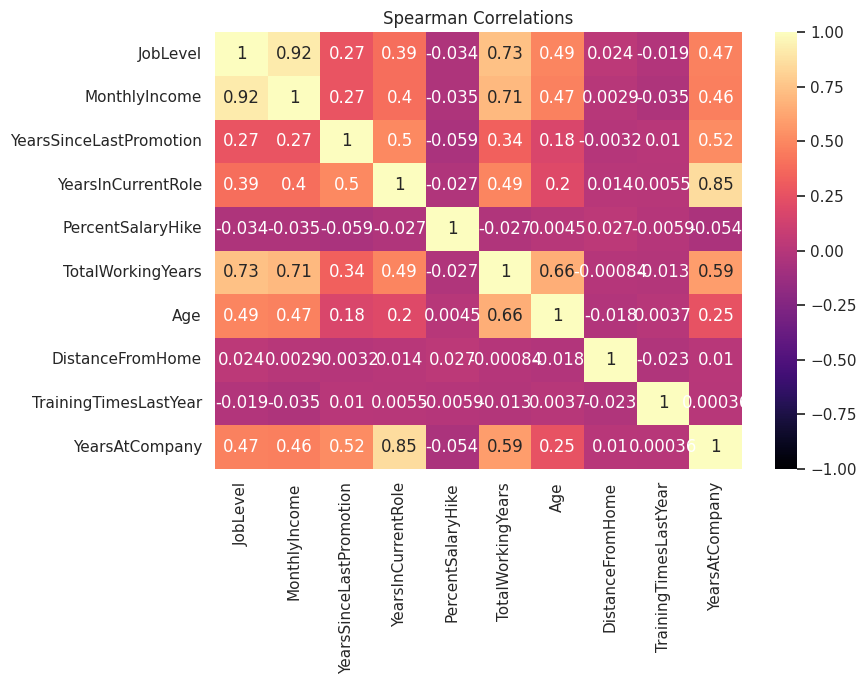

In [34]:
#  Heatmap of correlations
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="magma", vmin=-1, vmax=1)
plt.title("Spearman Correlations")
plt.tight_layout()
plt.show()

In [35]:
try:
    import statsmodels.formula.api as smf
    # Linear model for pay
    lm_pay = smf.ols(
        "MonthlyIncome ~ C(Gender) + Age + TotalWorkingYears + Education + JobLevel + C(OverTime) + C(Department)",
        data=df
    ).fit()
    print("\nLinear model: MonthlyIncome ~ predictors")
    print(lm_pay.summary())

    # Logistic for seniority
    glm_senior = smf.logit(
        "Senior_role ~ C(Gender) + Age + TotalWorkingYears + Education + C(OverTime) + C(Department)",
        data=df
    ).fit(disp=False)
    print("\nLogistic model: Senior_role ~ predictors")
    print(glm_senior.summary())
except ImportError:
    print("\n(statsmodels not installed; skip modeling or install via pip/conda)")



Linear model: MonthlyIncome ~ predictors
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1773.
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:41:35   Log-Likelihood:                -12863.
No. Observations:                1480   AIC:                         2.574e+04
Df Residuals:                    1471   BIC:                         2.579e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
# Exports so I can add to disso
# Categorical frequencies
freq_tables = {}
for c in categorical_columns:
    counts = df[c].value_counts(dropna=False)
    freq_tables[c] = pd.DataFrame({"count": counts, "percentage": (counts/len(df)*100).round(1)})
table_cat_freqs = freq_tables

# Descriptives by Gender (key numerics)
desc_rows = []
for col in ["MonthlyIncome","JobLevel","YearsSinceLastPromotion",
            "YearsInCurrentRole","PercentSalaryHike","TotalWorkingYears",
            "DistanceFromHome","TrainingTimesLastYear","YearsAtCompany"]:
    gdesc = df.groupby("Gender")[col].describe()
    tmp = gdesc.reset_index().assign(var=col)
    desc_rows.append(tmp)
table_desc_by_gender = pd.concat(desc_rows, ignore_index=True)


In [ ]:

# Correlation tables
table_corr_matrix = corr.copy()
table_corr_tests  = cor_tests.copy()

# Attrition correlations tables
table_attrition_overall = attr_tests.copy()
table_attrition_female  = attr_tests_f.copy()

# Composition tables
table_joblevel_by_gender_percentage = pd.crosstab(df["JobLevel"], df["Gender"], normalize="columns") * 100
table_jobrole_by_gender_percentage  = pd.crosstab(df["JobRole"],  df["Gender"], normalize="columns") * 100

table_desc_by_gender.to_csv("desc_by_gender.csv", index=False)
table_cat_freqs["Gender"].to_csv("gender_counts.csv")
table_corr_matrix.to_csv("spearman_corrs.csv")
table_corr_tests.to_csv("corr_tests.csv", index=False)
table_attrition_overall.to_csv("attrition_corrs_overall.csv", index=False)
table_att srition_female.to_csv("attrition_corrs_female.csv", index=False)
table_joblevel_by_gender_percentage.to_csv("joblevel_by_gender_percentage.csv")
table_jobrole_by_gender_percentage.to_csv("jobrole_by_gender_percentage.csv")


print("Tables Saved")